In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('default credit.csv')
df.head(5)

,ID,Default,Loan_Type,Gender,Age,Degree,Income,Credit_score,Loan_length,Signers,Citizenship
0,1,0,Car,Female,30,HS,114885,641,0,2,Citizen
1,2,0,Home,Female,43,HS,95770,534,7,2,Citizen
2,3,0,Home,Male,39,HS,94220,558,5,2,Citizen
3,4,0,Home,Male,39,College,58946,622,7,2,Citizen
4,5,0,Car,Female,42,HS,79754,702,2,1,Citizen


In [83]:
df.shape

(4348, 11)

**EXPLORATORY DATA ANALYSIS**

In [84]:
df.isnull().sum()

ID              0
Default         0
Loan_Type       0
Gender          0
Age             0
Degree          0
Income          0
Credit_score    0
Loan_length     0
Signers         0
Citizenship     0
dtype: int64

0    4054
1     294
Name: Default, dtype: int64


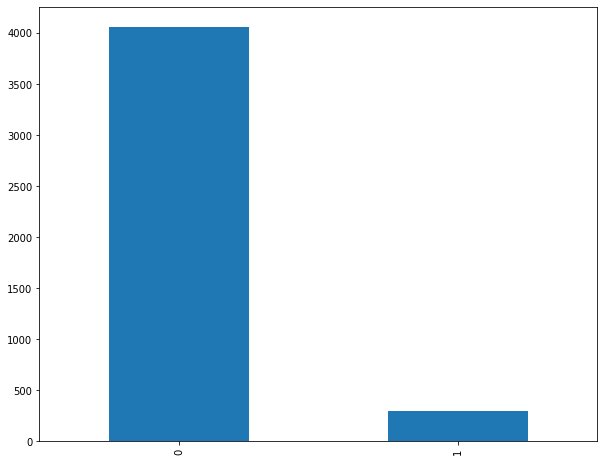

In [85]:
#Default
print(df['Default'].value_counts())
df['Default'].value_counts().plot(kind='bar',figsize=(10,8))

Car     2958
Home    1390
Name: Loan_Type, dtype: int64


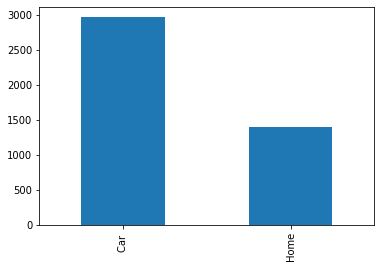

In [86]:
# Loan_Type
print(df['Loan_Type'].value_counts())
df['Loan_Type'].value_counts().plot(kind='bar')

Male      2587
Female    1761
Name: Gender, dtype: int64


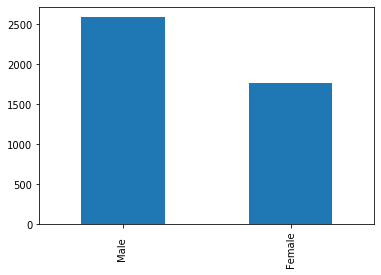

In [87]:
# Gender
print(df['Gender'].value_counts())
df['Gender'].value_counts().plot(kind='bar')

In [88]:
def rank_age(row):
    if row['Age'] <= 30:
            return 'Less than 30'
    else:
        return 'Above 30'

Above 30        4211
Less than 30     137
Name: Rank_age, dtype: int64


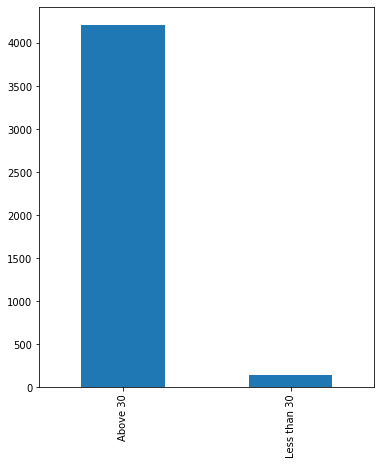

In [89]:
df['Rank_age'] = df.apply(lambda row: rank_age(row), axis=1)
print(df['Rank_age'].value_counts())
df['Rank_age'].value_counts().plot(kind='bar',figsize=(6,7))

HS          3031
College     1103
Gradaute     214
Name: Degree, dtype: int64


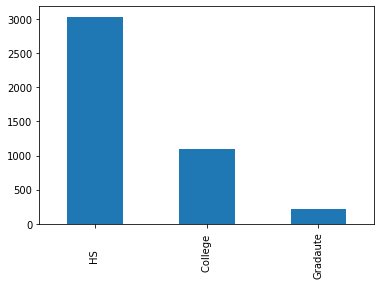

In [90]:
# Degree:
print(df['Degree'].value_counts())
df['Degree'].value_counts().plot(kind='bar')

In [91]:
# Income
def rank_income(row):
    if row['Income'] <= 50000:
            return 'Less than 50k'
    elif row['Income'] <= 100000:
        return 'Less than 100k'
    else:
        return 'Above 100k'

Less than 100k    2525
Above 100k        1803
Less than 50k       20
Name: Rank_income, dtype: int64


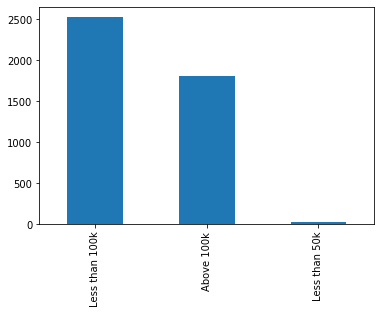

In [92]:
df['Rank_income'] = df.apply(lambda row: rank_income(row), axis=1)
print(df['Rank_income'].value_counts())
df['Rank_income'].value_counts().plot(kind='bar')

In [93]:
# Credit Score:
def rank_score(row):
    if row['Credit_score'] < 650:
        return 'Low Credit Score'
    elif row['Credit_score'] in [650,700]:
        return 'Good Credit Score'
    elif row['Credit_score'] > 700:
        return 'Excellent Credit Score'

Low Credit Score          3170
Excellent Credit Score     343
Good Credit Score           37
Name: Rank_Credit, dtype: int64


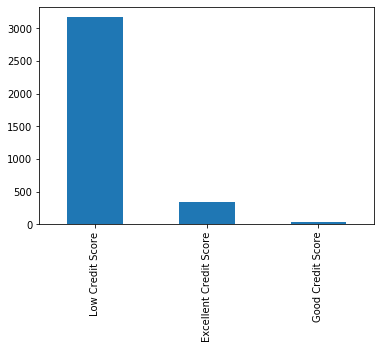

In [94]:
df['Rank_Credit'] = df.apply(lambda row: rank_score(row), axis=1)
print(df['Rank_Credit'].value_counts())
df['Rank_Credit'].value_counts().plot(kind='bar')

In [95]:
# Loan Length
def length_of_loan(row):
    if row['Loan_length'] < 5:
        return 'Less than 5 periods'
    elif row['Loan_length'] in [5,10]:
        return 'Less than 10 periods'
    elif row['Loan_length'] > 10:
        return 'More than 10 periods'

Less than 5 periods     3394
Less than 10 periods     284
More than 10 periods      79
Name: length_of_loan, dtype: int64


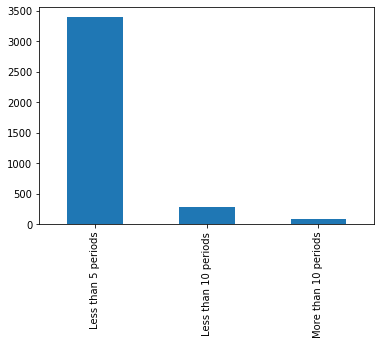

In [96]:
df['length_of_loan'] = df.apply(lambda row: length_of_loan(row), axis=1)
print(df['length_of_loan'].value_counts())
df['length_of_loan'].value_counts().plot(kind='bar')

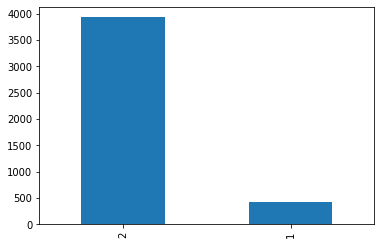

In [97]:
# Signers
df['Signers'].value_counts().plot(kind='bar')

Citizen        4173
Non-citizen     175
Name: Citizenship, dtype: int64


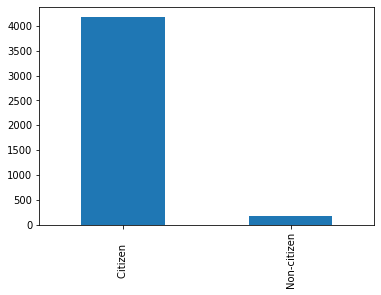

In [98]:
#Citizenship
print(df['Citizenship'].value_counts())
df['Citizenship'].value_counts().plot(kind='bar')

In [99]:
df.head()

,ID,Default,Loan_Type,Gender,Age,Degree,Income,Credit_score,Loan_length,Signers,Citizenship,Rank_age,Rank_income,Rank_Credit,length_of_loan
0,1,0,Car,Female,30,HS,114885,641,0,2,Citizen,Less than 30,Above 100k,Low Credit Score,Less than 5 periods
1,2,0,Home,Female,43,HS,95770,534,7,2,Citizen,Above 30,Less than 100k,Low Credit Score,None
2,3,0,Home,Male,39,HS,94220,558,5,2,Citizen,Above 30,Less than 100k,Low Credit Score,Less than 10 periods
3,4,0,Home,Male,39,College,58946,622,7,2,Citizen,Above 30,Less than 100k,Low Credit Score,None
4,5,0,Car,Female,42,HS,79754,702,2,1,Citizen,Above 30,Less than 100k,Excellent Credit Score,Less than 5 periods


Gender  Rank_age    
Female  Above 30        1727
        Less than 30      34
Male    Above 30        2484
        Less than 30     103
Name: Rank_age, dtype: int64


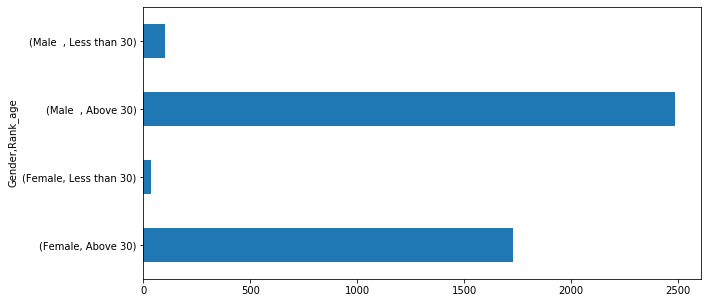

In [100]:
print(df.groupby('Gender')['Rank_age'].value_counts())
df.groupby('Gender')['Rank_age'].value_counts().plot(kind='barh',figsize=(10,5))

Gender  Rank_income   
Female  Above 100k         929
        Less than 100k     830
        Less than 50k        2
Male    Less than 100k    1695
        Above 100k         874
        Less than 50k       18
Name: Rank_income, dtype: int64


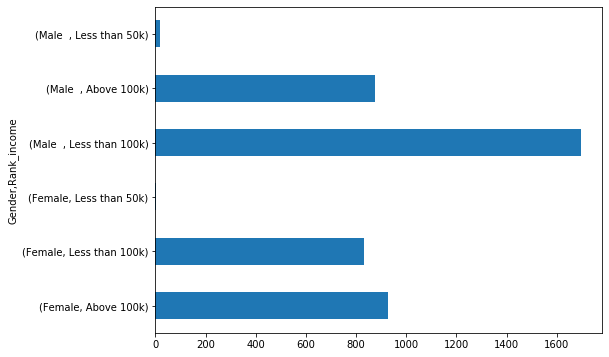

In [101]:
print(df.groupby('Gender')['Rank_income'].value_counts())
df.groupby('Gender')['Rank_income'].value_counts().plot(kind='barh',figsize=(8,6))

Gender  Rank_Credit           
Female  Low Credit Score          1127
        Excellent Credit Score     202
        Good Credit Score           23
Male    Low Credit Score          2043
        Excellent Credit Score     141
        Good Credit Score           14
Name: Rank_Credit, dtype: int64


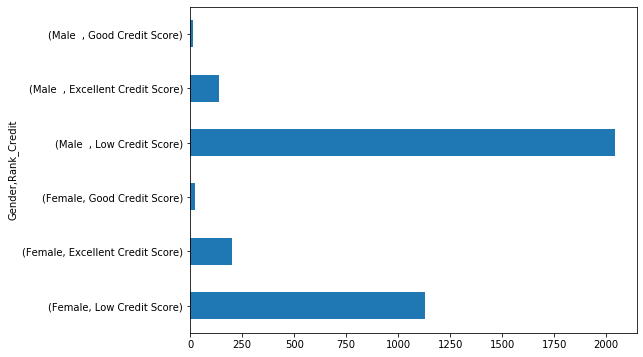

In [102]:
print(df.groupby('Gender')['Rank_Credit'].value_counts())
df.groupby('Gender')['Rank_Credit'].value_counts().plot(kind='barh',figsize=(8,6))

Gender  Default
Female  0          1581
        1           180
Male    0          2473
        1           114
Name: Default, dtype: int64


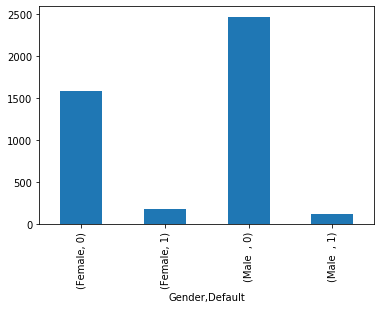

In [103]:
# Gender and Default
df_Gender = df.groupby(['Gender','Default'])['Default'].count()
print(df_Gender)
df_Gender.plot(kind='bar')

Rank_income     Default
Above 100k      0          1595
                1           208
Less than 100k  0          2439
                1            86
Less than 50k   0            20
Name: Default, dtype: int64


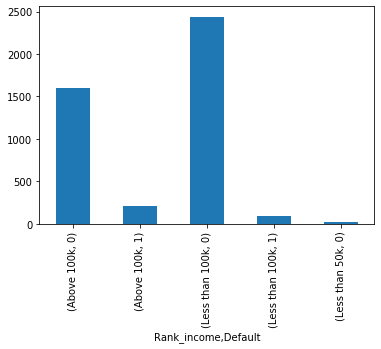

In [104]:
# Income and Default
df_income = df.groupby(['Rank_income','Default'])['Default'].count()
print(df_income)
df_income.plot(kind='bar')

Rank_Credit             Default
Excellent Credit Score  0           274
                        1            69
Good Credit Score       0            31
                        1             6
Low Credit Score        0          3044
                        1           126
Name: Default, dtype: int64


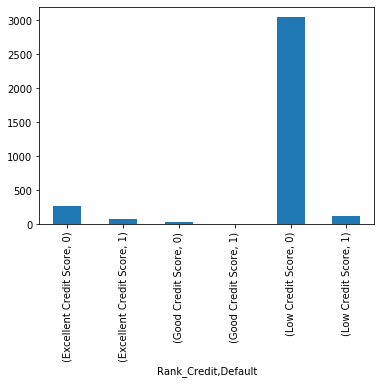

In [105]:
# Credit and Default
df_credit = df.groupby(['Rank_Credit','Default'])['Default'].count()
print(df_credit)
df_credit.plot(kind='bar')

Rank_age      Default
Above 30      0          3918
              1           293
Less than 30  0           136
              1             1
Name: Default, dtype: int64


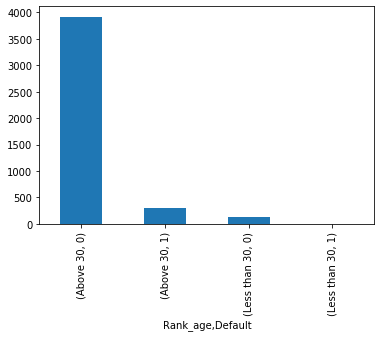

In [106]:
# Age group and Default
df_age = df.groupby(['Rank_age','Default'])['Default'].count()
print(df_age)
df_age.plot(kind='bar')

Citizenship  Default
Citizen      0          3911
             1           262
Non-citizen  0           143
             1            32
Name: Default, dtype: int64


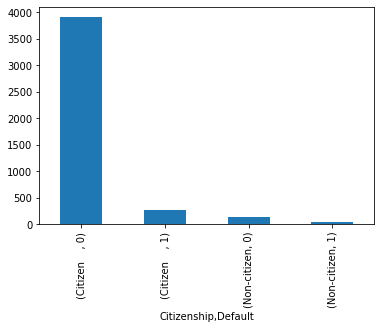

In [107]:
# Gender and Default
df_citizenship = df.groupby(['Citizenship','Default'])['Default'].count()
print(df_citizenship)
df_citizenship.plot(kind='bar')

In [108]:
df_new = df[['Age','Income','Credit_score','Loan_length','Signers']]

df_new.corr()

,Age,Income,Credit_score,Loan_length,Signers
Age,1.000000,0.312149,0.334899,-0.008837,-0.178245
Income,0.312149,1.000000,0.314137,0.051613,-0.139002
Credit_score,0.334899,0.314137,1.000000,-0.006201,-0.228284
Loan_length,-0.008837,0.051613,-0.006201,1.000000,-0.007507
Signers,-0.178245,-0.139002,-0.228284,-0.007507,1.000000


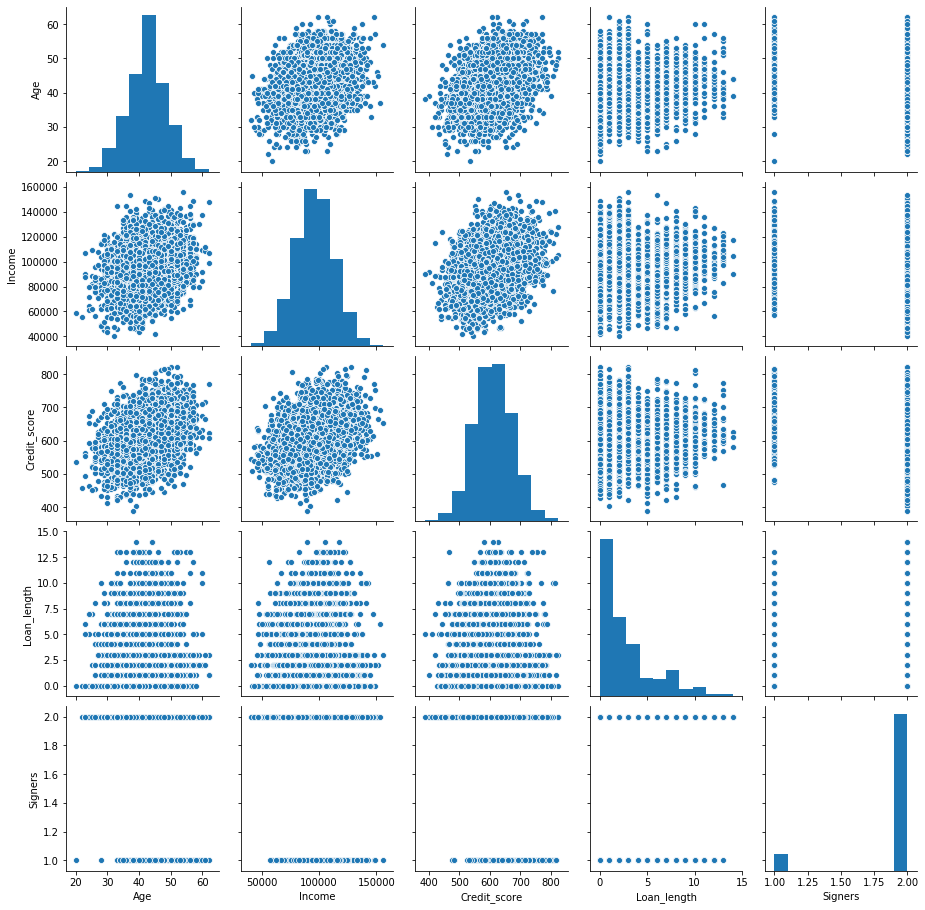

In [109]:
sns.pairplot(data=df_new)

**Prepare Data For Applying Machine Learning**

In [110]:
ML_data=df[['Age','Income','Credit_score','Loan_length','Default']]

In [111]:
X=ML_data[['Age','Income','Credit_score','Loan_length']]
Y=ML_data['Default']
print(X.shape)
print(Y.shape)

(4348, 4)
(4348,)


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

**Support Vector Machine and Logistic Regression**

In [114]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

Support Vector Machine

In [115]:
model_svm = SGDClassifier()
model_svm.fit(X_train,y_train)

SGDClassifier()

In [116]:
pred_svm = model_svm.predict(X_test)

In [117]:
print(f'accuracy_SVM:{accuracy_score(pred_svm,y_test)*100}')
print(f"precision_SVM:{precision_score(pred_svm,y_test,average='macro')*100}")
print(f"recall_SVM:{recall_score(pred_svm,y_test,average='macro')*100}")
print(f"f1_SVM:{f1_score(pred_svm,y_test,average='macro')*100}")

accuracy_SVM:94.02298850574712
precision_SVM:50.0
recall_SVM:47.01149425287356
f1_SVM:48.45971563981043


C:\Users\namdo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
print(classification_report(pred_svm,y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       870
           1       0.00      0.00      0.00         0

    accuracy                           0.94       870
   macro avg       0.50      0.47      0.48       870
weighted avg       1.00      0.94      0.97       870



C:\Users\namdo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[]

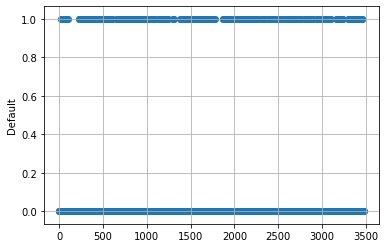

In [119]:
X_train1=np.arange(0,len(X_train),1)
plt.scatter(X_train1,y_train)
plt.ylabel('Default')
plt.grid()
plt.plot()

Text(0.5, 1.0, 'Prediction Based on SVM')

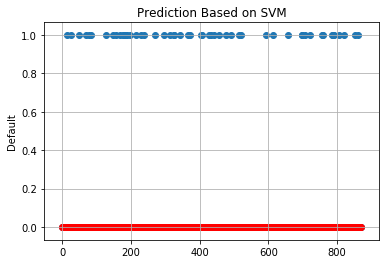

In [120]:
X_test1=np.arange(0,len(X_test),1)
plt.scatter(X_test1,y_test)
plt.scatter(X_test1,pred_svm,color='r')
plt.ylabel('Default')
plt.grid()
plt.plot()
plt.title('Prediction Based on SVM')

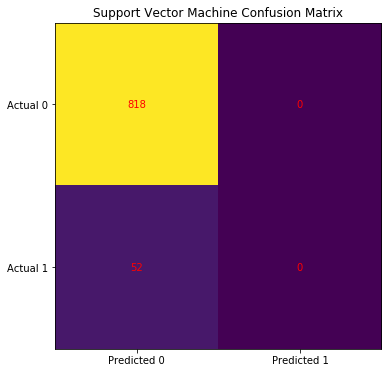

In [121]:
cm_svm = confusion_matrix(y_test, pred_svm)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm_svm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0','Predicted 1'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0','Actual 1'))
ax.set_title('Support Vector Machine Confusion Matrix')

ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_svm[i,j], ha='center', va='center', color='red')


Area under the ROC curve: 0.500


C:\Users\namdo\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


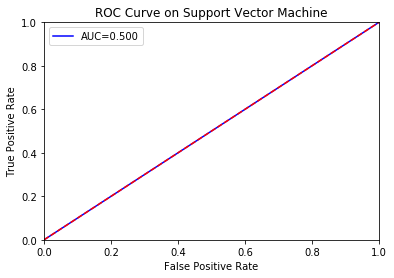

In [122]:
#Get data to plot ROC curve

fp, tp, th = roc_curve(y_test, pred_svm)
roc_auc_svm=auc(fp,tp)

#Plot ROC curve
plt.title('ROC Curve on Support Vector Machine')
plt.plot(fp, tp, 'b',
label='AUC=%0.3f'%roc_auc_svm)
plt.legend(loc='lower_right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

print('Area under the ROC curve: {:.3f}'.format(roc_auc_svm))

Logistic Regression

In [45]:
y_train_new = y_train.values.reshape(-1,2)
X_train_new = X_train.values.reshape(-1,2)
print(y_train_new.shape)
print(X_train_new.shape)

(1739, 2)
(6956, 2)


In [46]:
model_log = LogisticRegression()
model_log.fit(X_train,y_train)

LogisticRegression()

In [47]:
pred_log=model_log.predict(X_test)

In [48]:
print(f'accuracy_log:{accuracy_score(pred_log,y_test)*100}')
print(f"precision_log:{precision_score(pred_log,y_test,average='macro')*100}")
print(f"recall_log:{recall_score(pred_log,y_test,average='macro')*100}")
print(f"f1_log:{f1_score(pred_log,y_test,average='macro')*100}")

accuracy_log:94.02298850574712
precision_log:50.0
recall_log:47.01149425287356
f1_log:48.45971563981043


C:\Users\namdo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       818
           1       0.00      0.00      0.00        52

    accuracy                           0.94       870
   macro avg       0.47      0.50      0.48       870
weighted avg       0.88      0.94      0.91       870



C:\Users\namdo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
confusion_matrix(y_test,pred_log)

array([[818,   0],
       [ 52,   0]], dtype=int64)

[]

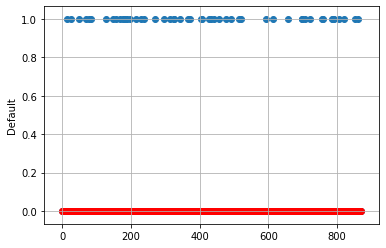

In [51]:
plt.scatter(X_test1,y_test)
plt.scatter(X_test1,pred_log,c='r')
plt.ylabel('Default')
plt.grid()
plt.plot()

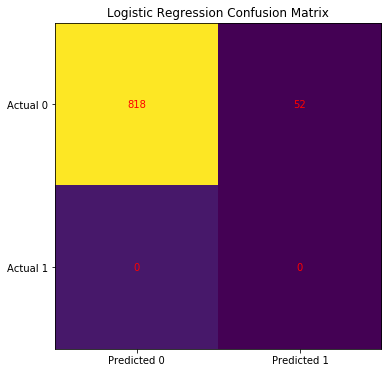

In [52]:
cm_log = confusion_matrix(y_test,pred_log)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm_log)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0','Predicted 1'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0','Actual 1'))
ax.set_title('Logistic Regression Confusion Matrix')

ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(i, j, cm_log[i,j], ha='center', va='center', color='red')

Area under the ROC curve: 0.500


C:\Users\namdo\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


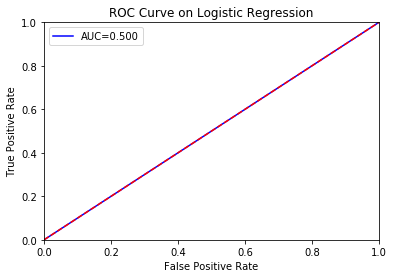

In [53]:
# Get data for ROC curve:
fp, tp, th = roc_curve(y_test, pred_log)
roc_auc_log = auc(fp,tp)

# Plot ROC curve
plt.title('ROC Curve on Logistic Regression')
plt.plot(fp, tp, 'b',
        label='AUC=%0.3f'%roc_auc_log)
plt.legend(loc='lower_right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

print('Area under the ROC curve: {:.3f}'.format(roc_auc_log))

**KNearestNeighbor**

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier()
model_knn = knn.fit(X_train,y_train)

In [56]:
pred_knn = model_knn.predict(X_test)

In [57]:
print(f'accuracy_knn:{accuracy_score(pred_knn,y_test)*100}')
print(f"precision_knn:{precision_score(pred_knn,y_test,average='macro')*100}")
print(f"recall_knn:{recall_score(pred_knn,y_test,average='macro')*100}")
print(f"f1_knn:{f1_score(pred_knn,y_test,average='macro')*100}")

accuracy_knn:93.67816091954023
precision_knn:50.71703968403235
recall_knn:57.052023121387286
f1_knn:50.120399036807704


In [58]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       818
           1       0.20      0.02      0.04        52

    accuracy                           0.94       870
   macro avg       0.57      0.51      0.50       870
weighted avg       0.90      0.94      0.91       870



In [59]:
confusion_matrix(y_test,pred_knn)

array([[814,   4],
       [ 51,   1]], dtype=int64)

[]

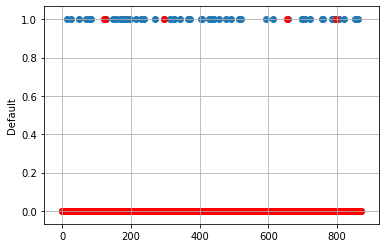

In [60]:
plt.scatter(X_test1,y_test)
plt.scatter(X_test1,pred_knn,c='r')
plt.ylabel('Default')
plt.grid()
plt.plot()

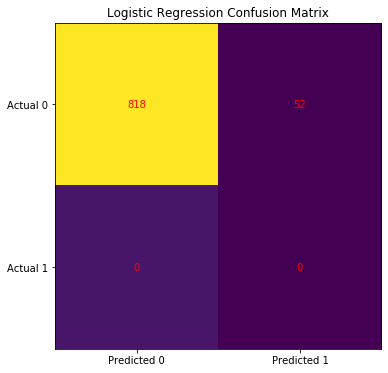

In [61]:
cm_knn = confusion_matrix(y_test,pred_knn)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm_knn)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0','Predicted 1'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0','Actual 1'))
ax.set_title('Logistic Regression Confusion Matrix')

ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(i, j, cm_log[i,j], ha='center', va='center', color='red')

Area under the ROC curve: 0.507


C:\Users\namdo\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


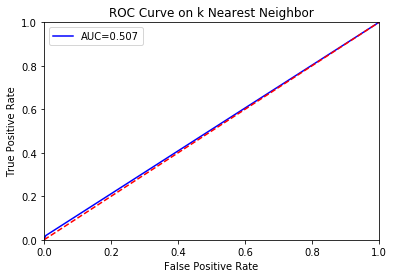

In [62]:
# Get data for ROC curve:
fp, tp, th = roc_curve(y_test, pred_knn)
roc_auc_knn = auc(fp,tp)

# Plot ROC curve
plt.title('ROC Curve on k Nearest Neighbor')
plt.plot(fp, tp, 'b',
        label='AUC=%0.3f'%roc_auc_knn)
plt.legend(loc='lower_right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

print('Area under the ROC curve: {:.3f}'.format(roc_auc_knn))

**Naive Bayes**

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
model_nb = GaussianNB()
model_nb.fit(X_train,y_train)

GaussianNB()

In [65]:
pred_nb = model_nb.predict(X_test)

In [66]:
print(f'accuracy_nb:{accuracy_score(pred_nb,y_test)*100}')
print(f"precision_nb:{precision_score(pred_nb,y_test,average='macro')*100}")
print(f"recall_nb:{recall_score(pred_nb,y_test,average='macro')*100}")
print(f"f1_nb:{f1_score(pred_nb,y_test,average='macro')*100}")

accuracy_nb:93.2183908045977
precision_nb:51.37295467368818
recall_nb:56.180548206159386
f1_nb:51.415509555044444


In [67]:
print(classification_report(y_test,pred_nb))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       818
           1       0.18      0.04      0.06        52

    accuracy                           0.93       870
   macro avg       0.56      0.51      0.51       870
weighted avg       0.90      0.93      0.91       870



[]

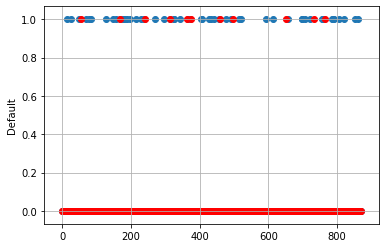

In [68]:
plt.scatter(X_test1,y_test)
plt.scatter(X_test1,pred_nb,c='r')
plt.ylabel('Default')
plt.grid()
plt.plot()

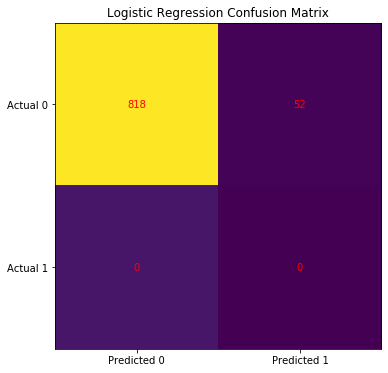

In [69]:
cm_nb = confusion_matrix(y_test,pred_nb)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm_nb)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0','Predicted 1'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0','Actual 1'))
ax.set_title('Logistic Regression Confusion Matrix')

ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(i, j, cm_log[i,j], ha='center', va='center', color='red')

Area under the ROC curve: 0.514


C:\Users\namdo\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


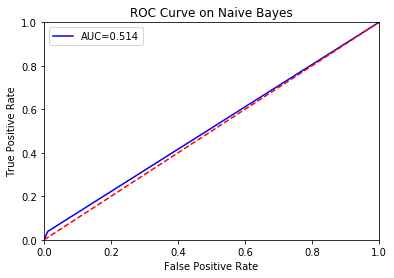

In [72]:
# Get data for ROC curve:
fp, tp, th = roc_curve(y_test, pred_nb)
roc_auc_nb = auc(fp,tp)

# Plot ROC curve
plt.title('ROC Curve on Naive Bayes')
plt.plot(fp, tp, 'b',
        label='AUC=%0.3f'%roc_auc_nb)
plt.legend(loc='lower_right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

print('Area under the ROC curve: {:.3f}'.format(roc_auc_nb))

**Random Forest**

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
model_rfc=RandomForestClassifier()
model_rfc.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
pred_rfc = model_rfc.predict(X_test)

In [76]:
print(f'accuracy_rfc:{accuracy_score(pred_rfc,y_test)*100}')
print(f"precision_rfc:{precision_score(pred_rfc,y_test,average='macro')*100}")
print(f"recall_rfc:{recall_score(pred_rfc,y_test,average='macro')*100}")
print(f"f1_rfc:{f1_score(pred_rfc,y_test,average='macro')*100}")

accuracy_rfc:93.5632183908046
precision_rfc:50.65591498965583
recall_rfc:55.38194444444444
f1_rfc:50.05945303210464


In [77]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       818
           1       0.17      0.02      0.03        52

    accuracy                           0.94       870
   macro avg       0.55      0.51      0.50       870
weighted avg       0.89      0.94      0.91       870



[]

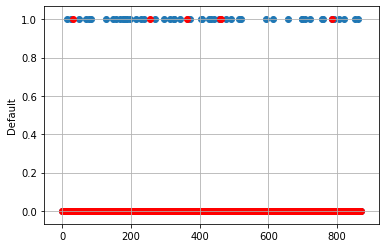

In [78]:
plt.scatter(X_test1,y_test)
plt.scatter(X_test1,pred_rfc,c='r')
plt.ylabel('Default')
plt.grid()
plt.plot()

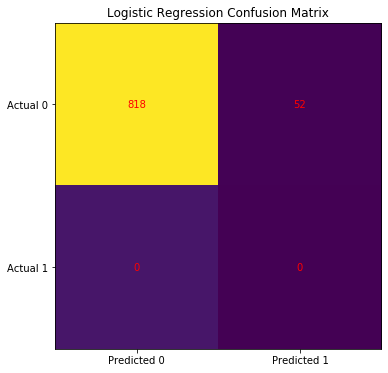

In [79]:
cm_rfc = confusion_matrix(y_test,pred_rfc)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm_rfc)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0','Predicted 1'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0','Actual 1'))
ax.set_title('Logistic Regression Confusion Matrix')

ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(i, j, cm_log[i,j], ha='center', va='center', color='red')

Area under the ROC curve: 0.507


C:\Users\namdo\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


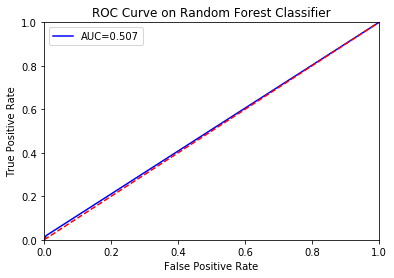

In [80]:
# Get data for ROC curve:
fp, tp, th = roc_curve(y_test, pred_rfc)
roc_auc_rfc = auc(fp,tp)

# Plot ROC curve
plt.title('ROC Curve on Random Forest Classifier')
plt.plot(fp, tp, 'b',
        label='AUC=%0.3f'%roc_auc_rfc)
plt.legend(loc='lower_right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

print('Area under the ROC curve: {:.3f}'.format(roc_auc_rfc))

In [93]:
print(f'accuracy_train_svm:{model_svm.score(X_train,y_train)*100}')
print(f'accuracy_train_log:{model_log.score(X_train,y_train)*100}')
print(f'accuracy_train_knn:{model_knn.score(X_train,y_train)*100}')
print(f'accuracy_train_nb:{model_nb.score(X_train,y_train)*100}')
print(f'accuracy_train_rfc:{model_rfc.score(X_train,y_train)*100}')

accuracy_train_svm:93.04197814836112
accuracy_train_log:93.04197814836112
accuracy_train_knn:93.27199539965497
accuracy_train_nb:92.66820011500863
accuracy_train_rfc:100.0


In [94]:
test_score = {'Test':[94.02,94.02,93.67,93.21,93.67],
             'Train':[93.04,93.04,93.27,92.58,99.94]}

test_score_frame = pd.DataFrame.from_dict(test_score, orient='index',columns=['Support Vector Machine','Logistic Regression','KNeareastNeighbor','Naive Bayes','Random Forest Classifier'])

test_score_frame

,Support Vector Machine,Logistic Regression,KNeareastNeighbor,Naive Bayes,Random Forest Classifier
Test,94.02,94.02,93.67,93.21,93.67
Train,93.04,93.04,93.27,92.58,99.94


In [95]:
x1=X.iloc[5,:].values.reshape(1,4)
x1.shape

(1, 4)

In [96]:
pred_svm1 = model_svm.predict(x1)
pred_svm1

array([0], dtype=int64)

In [97]:
pred_log1 = model_svm.predict(x1)
pred_log1

array([0], dtype=int64)

In [98]:
pred_knn1 = model_svm.predict(x1)
pred_knn1

array([0], dtype=int64)

In [99]:
pred_nb1 = model_nb.predict(x1)
pred_nb1

array([0], dtype=int64)

In [100]:
pred_rfc1 = model_rfc.predict(x1)
pred_rfc1

array([0], dtype=int64)

In [101]:
Y.iloc[5]

0

**Let predict if this man will likely default the loan**

**Age = 30, income = 65000, credit score = 724, length of loan = 4**

In [102]:
X2 = np.reshape([30,65000,724,4],(4,1)).T
X2.shape

(1, 4)

In [103]:
pred_svm2 = model_svm.predict(X2)
pred_svm2

array([0], dtype=int64)

In [104]:
pred_log2 = model_log.predict(X2)
pred_log2

array([0], dtype=int64)

In [105]:
pred_knn2 = model_knn.predict(X2)
pred_knn2

array([0], dtype=int64)

In [106]:
pred_nb2 = model_nb.predict(X2)
pred_nb2

array([0], dtype=int64)

In [107]:
pred_rfc2 = model_rfc.predict(X2)
pred_rfc2

array([0], dtype=int64)